# MSCOCO2017 PythonAPI tutorials

关于coco的pythonAPI，请先安装pycocotools：
- ubuntu和mac上直接pip install pycocotools
- windows用户先git clone https://github.com/cocodataset/cocoapi.git ，之后去cd到pythonapi目录,然后
> python setup.py build_ext --inplace

之后修改setup.py中的compile_args,在下面这一行：
>extra_compile_args=['-Wno-cpp', '-Wno-unused-function', '-std=c99']

在该行代码中去掉前两个flag，就可以顺利通过编译

In [3]:
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

参照cocoapi的官方repo，我们先下载coco2017数据集，其中包含了保存图片信息的json文件，我们在这读取instance_2017val集上的文件

In [7]:
dataDir='./'
dataType='val2017'
annFile='{}/instances_{}.json'.format(dataDir,dataType)

读取文件后，直接实例化一个COCO类，之后就可以调用其中的操作

In [8]:
coco=COCO(annFile)

loading annotations into memory...
Done (t=0.62s)
creating index...
index created!


可以查看cocoapi中提供的源码，我们按照官网的实例解析，先调用loadCats方法，该方法根据传入的id返回一个cat类的图信息,信息包括{id,name,supercatogory}，name中是图中信息,supercategory是该内容所属的大类别。之后可以通过拿对应字段获取你需要的信息。

In [35]:
cats = coco.loadCats(coco.getCatIds())
print(cats)
nms = [cat['name'] for cat in cats]
nms = set([cat['supercategory'] for cat in cats])
print('-'*120)
print(nms)

[{'supercategory': 'person', 'id': 1, 'name': 'person'}, {'supercategory': 'vehicle', 'id': 2, 'name': 'bicycle'}, {'supercategory': 'vehicle', 'id': 3, 'name': 'car'}, {'supercategory': 'vehicle', 'id': 4, 'name': 'motorcycle'}, {'supercategory': 'vehicle', 'id': 5, 'name': 'airplane'}, {'supercategory': 'vehicle', 'id': 6, 'name': 'bus'}, {'supercategory': 'vehicle', 'id': 7, 'name': 'train'}, {'supercategory': 'vehicle', 'id': 8, 'name': 'truck'}, {'supercategory': 'vehicle', 'id': 9, 'name': 'boat'}, {'supercategory': 'outdoor', 'id': 10, 'name': 'traffic light'}, {'supercategory': 'outdoor', 'id': 11, 'name': 'fire hydrant'}, {'supercategory': 'outdoor', 'id': 13, 'name': 'stop sign'}, {'supercategory': 'outdoor', 'id': 14, 'name': 'parking meter'}, {'supercategory': 'outdoor', 'id': 15, 'name': 'bench'}, {'supercategory': 'animal', 'id': 16, 'name': 'bird'}, {'supercategory': 'animal', 'id': 17, 'name': 'cat'}, {'supercategory': 'animal', 'id': 18, 'name': 'dog'}, {'supercategory

如果想要获取一张图片的具体信息包括标注信息等等，可以通过getImgId->load的方法读取图片的信息，之后再拿到原图或者我们需要的图片，具体的示例如下所示：

In [42]:
import skimage.io as io
ids = coco.getImgIds()  #获取标注信息及图片文件信息
id = ids[0]   #我们这里取第一个id做示例
img = coco.loadImgs(id)
print(img)

[{'license': 4, 'file_name': '000000397133.jpg', 'coco_url': 'http://images.cocodataset.org/val2017/000000397133.jpg', 'height': 427, 'width': 640, 'date_captured': '2013-11-14 17:02:52', 'flickr_url': 'http://farm7.staticflickr.com/6116/6255196340_da26cf2c9e_z.jpg', 'id': 397133}]


调用loadImg方法后，可以获得图片内的具体信息。如果想要获取图片信息，直接读取coco_url字段，调用api可得：

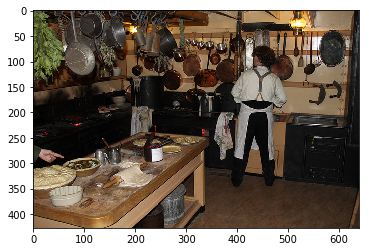

In [45]:
import matplotlib.pyplot as plt
Image = io.imread(img[0]['coco_url'])
plt.imshow(Image)
plt.show()

如果你下载了coco数据集，也可以直接读取本地的数据集的信息，将上面代码部分的coco_url字段改换为file_name字段即可。如果想获取标注信息，那可以参考如下代码所示：

In [50]:
ids = coco.getAnnIds()
id = ids[0]
img = coco.loadAnns(id)
img

[{'area': 702.1057499999998,
  'bbox': [473.07, 395.93, 38.65, 28.67],
  'category_id': 18,
  'id': 1768,
  'image_id': 289343,
  'iscrowd': 0,
  'segmentation': [[510.66,
    423.01,
    511.72,
    420.03,
    510.45,
    416.0,
    510.34,
    413.02,
    510.77,
    410.26,
    510.77,
    407.5,
    510.34,
    405.16,
    511.51,
    402.83,
    511.41,
    400.49,
    510.24,
    398.16,
    509.39,
    397.31,
    504.61,
    399.22,
    502.17,
    399.64,
    500.89,
    401.66,
    500.47,
    402.08,
    499.09,
    401.87,
    495.79,
    401.98,
    490.59,
    401.77,
    488.79,
    401.77,
    485.39,
    398.58,
    483.9,
    397.31,
    481.56,
    396.35,
    478.48,
    395.93,
    476.68,
    396.03,
    475.4,
    396.77,
    473.92,
    398.79,
    473.28,
    399.96,
    473.49,
    401.87,
    474.56,
    403.47,
    473.07,
    405.59,
    473.39,
    407.71,
    476.68,
    409.41,
    479.23,
    409.73,
    481.56,
    410.69,
    480.4,
    411.85,
    4

可以看到，annotation的标注字段包含了图片id，bounding box，语义以及关键点坐标的标注信息。此时如果想拿到任何标注信息，直接获取字典内信息即可。还可以直接拿到image_id的信息读取图片，在根据上面读原图的方法继续操作，获取原图信息。总体来说coco PythonAPI的操作大概就如上所示，非常方便。其他详情可以参照coco API中的源码。